In [5]:
import pandas as pd
import numpy as np
from sklearn import manifold #this is where your mds library are located
import matplotlib.pyplot as plt

In [6]:
data= pd.read_excel("Toothpaste.xlsx",index_col='Similarities')
print(data)

              Aqua-Fresh  Crest  Colgate  Gleem  Plus White  Ultra Brite  \
Similarities                                                               
Aqua-Fresh             0      6        7      3           3            3   
Crest                  6      0        7      3           4            2   
Colgate                7      7        0      5           4            2   
Gleem                  3      3        5      0           5            6   
Plus White             3      4        4      5           0            5   
Ultra Brite            3      2        2      6           5            0   
Close-Up               3      3        3      6           6            6   
Pepsodent              2      2        2      7           7            7   
Sensodyne              1      3        5      4           4            4   

              Close-Up  Pepsodent  Sensodyne  
Similarities                                  
Aqua-Fresh           3          2          1  
Crest                3

In [7]:
data.shape

(9, 9)

In [8]:
#Create the MDS using 2 components and use the precomputed matrix as input
mds=manifold.MDS(n_components=2,metric=False,dissimilarity="precomputed",random_state=42)
results=mds.fit(data.values) #converts the pnadas to numpy array

In [10]:
#Give the names of the columns to the variables 
#Used for labelling the perceptual maps later on
toothpaste= data.columns
print(toothpaste)

Index(['Aqua-Fresh', 'Crest', 'Colgate', 'Gleem', 'Plus White', 'Ultra Brite',
       'Close-Up', 'Pepsodent', 'Sensodyne'],
      dtype='object')


In [11]:
#These are the final cordinates for various brekfast
coords =results.embedding_
print(coords)

[[ 0.05830677  0.38300181]
 [ 0.33625364 -0.01867796]
 [-0.2854613  -0.27410619]
 [-0.29198147  0.14837084]
 [ 0.31845845  0.29219309]
 [-0.28790822  0.38472563]
 [ 0.59591347 -0.42523942]
 [-0.30325863 -0.56866093]
 [-0.10627702 -0.01939162]]


sklearn stress: 1.0390428686322237
This stress value is not normalized


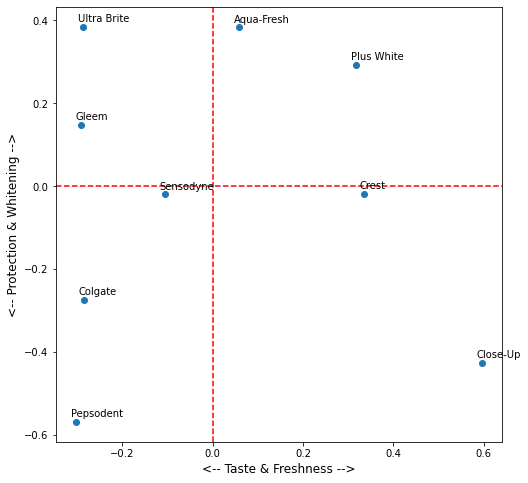

In [22]:
#sklearn stress - Kruskal's stress
stress= mds.stress_
print("sklearn stress: {}".format(stress))
print("This stress value is not normalized")
#To normalize the stress you have to divide by sum of Dij^2
#Plotting the figures
fig=plt.figure(figsize=(8,8))
plt.scatter(coords[:,0],coords[:,1])

plt.axvline(x = 0, color = 'r', linestyle='dashed')
plt.axhline(y = 0, color = 'r', linestyle='dashed')

plt.xlabel("<-- Taste & Freshness -->", fontsize=12)
plt.ylabel("<-- Protection & Whitening -->", fontsize=12)

for label,x,y in zip (toothpaste,coords[:,0],coords[:,1]):
  plt.annotate(
      label,
      xy=(x,y),
      xytext=(-5,5),
      textcoords ='offset points'
  )
plt.show()